In [4]:
import pandas as pd
import numpy as np


Importing data set

In [5]:
data=pd.read_csv('advertising.csv')

In [6]:
data.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [7]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [8]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [9]:
data.shape

(200, 4)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

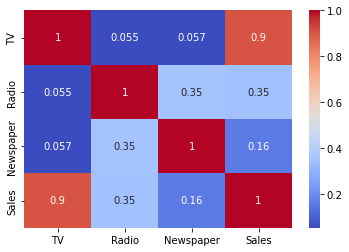

In [12]:
# Correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


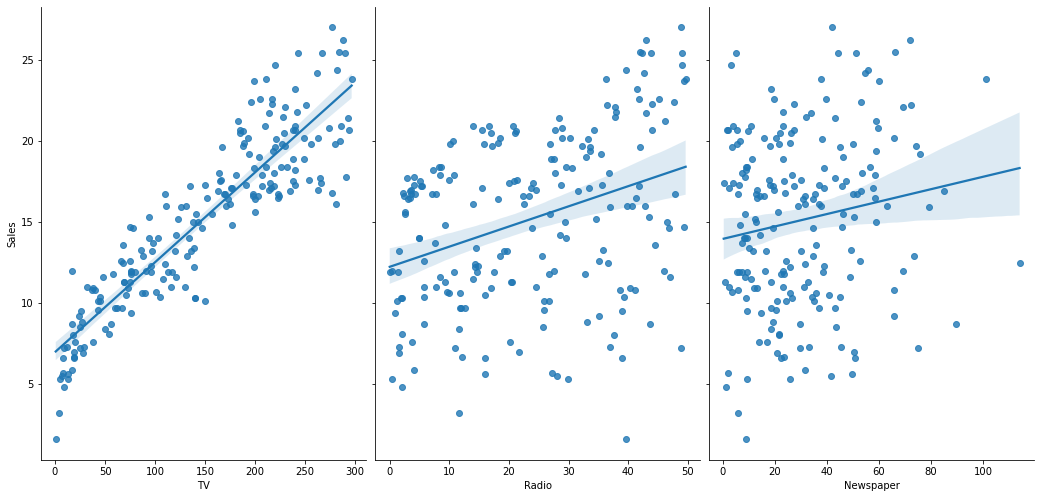

In [13]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [14]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols] 
y = data.Sales  # Output 



In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [16]:



# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate, fit
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


15.107177173828887
[ 4.71689868  1.52666169 -0.01957661]
1.5522028259516762


     Actual  Predicted
58     23.8  21.327278
40     16.6  18.061384
34     11.9  10.046303
102    19.8  21.092542
184    17.6  20.785275


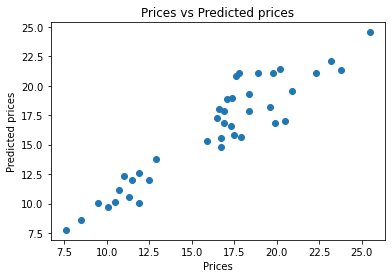

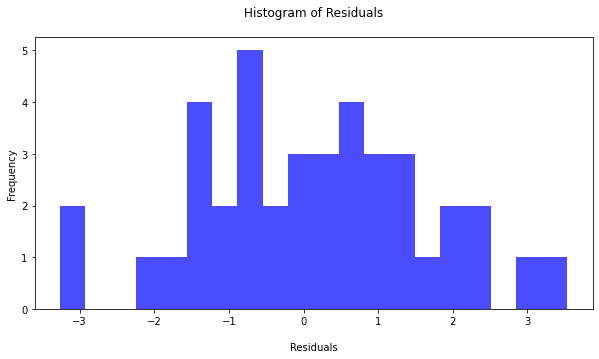

In [17]:
# printing predicted and actual result
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())


# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Plotting histogram of Residuals to understand the distribution
plt.figure(figsize=(10,5))
plt.hist(y_test-y_pred, bins=20, color='blue', alpha=0.7)
plt.xlabel("\nResiduals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\n")
plt.show()

Visualization of Rsiduals help to understandthe difference between predicted and actual results.

In [18]:

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2754390912939682
Mean Squared Error: 2.4093336128923695
Root Mean Squared Error: 1.5522028259516762
